In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# 2. Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Criar o pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 4. Treinar o modelo
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

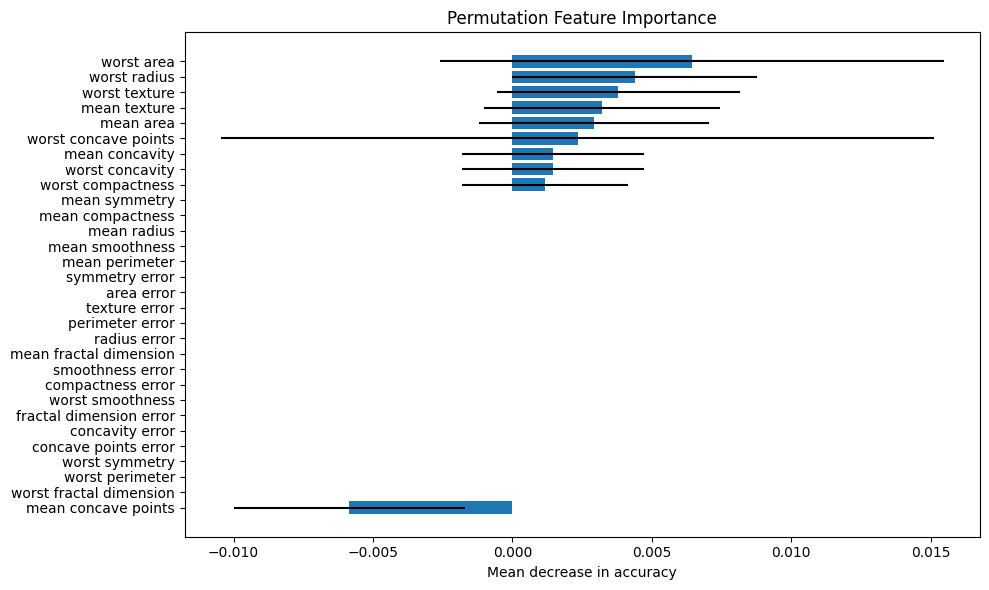

In [3]:
# 5. Calcular a importância por permutação (em cima dos dados de teste)
result = permutation_importance(
    pipeline, X_test, y_test,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

# 6. Organizar os resultados
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean,
    'Std': result.importances_std
}).sort_values(by='Importance', ascending=False)

# 7. Plotar
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Std'])
plt.xlabel('Mean decrease in accuracy')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()